In [38]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix
from functions import *
import numpy as np
import os
import shutil
import pandas as pd
import seaborn as sns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
model_baseline = load_model('MODELS/baseline_original_all_epochs.h5')
input_shape = (150, 150, 3)

path = 'DATASET/DATASET-2/VAL'

generator = ImageDataGenerator(rescale = 1 / 255)
batches = generator.flow_from_directory(path, 
                                                target_size = input_shape[:2], 
                                                class_mode = 'binary', 
                                                shuffle = False)

batches.reset()
probabilities = model_baseline.predict_generator(batches)

Found 7220 images belonging to 2 classes.


In [3]:
num_organic = len(os.listdir(path + '/O'))
num_recyclable = len(os.listdir(path + '/R'))

len(batches.filenames) == num_organic + num_recyclable

True

**Results:** 

Accuracy Score: 0.83
Recall Score: 0.81
Specificity Score: 0.84


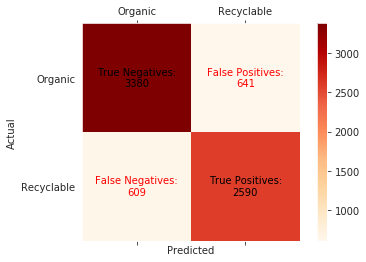

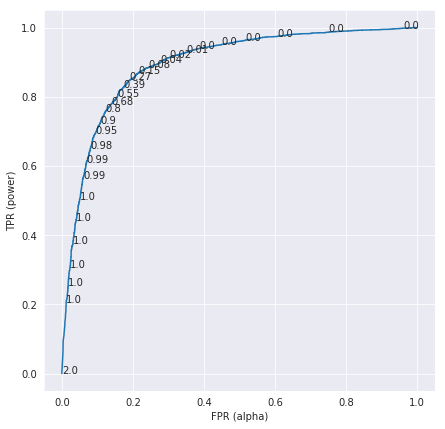

In [40]:
sns.set_style('darkgrid')

threshold = 0.5

y_true = np.array([0] * num_organic + [1] * num_recyclable)
y_pred = np.hstack(probabilities > threshold)

confusion_matrix_baseline = confusion_matrix(y_true, y_pred)

print('**Results:** \n')
print('Accuracy Score: {}'.format(round(accuracy_score(y_true, y_pred), 2)))
print('Recall Score: {}'.format(round(recall_score(y_true, y_pred), 2)))
print('Specificity Score: {}'.format(round(confusion_matrix_baseline[0][0] / sum(confusion_matrix_baseline[0]), 2)))
plot_confusion_matrix(y_true, y_pred, 'Recyclable', 'Organic')
roc_plot(y_true, probabilities, 70)

In [5]:
threshold_results = pd.DataFrame(None, columns = ['Threshold', 'Accuracy', 'Recall', 'Specificity'])

thresholds = np.linspace(0.2,0.5, 31)

y_true_sensitize = np.array([0] * num_organic + [1] * num_recyclable)

for i in thresholds:
    y_pred_sensitize = np.hstack(probabilities > i)

    confusion_matrix_baseline = confusion_matrix(y_true_sensitize, y_pred_sensitize)
    threshold_results = threshold_results.append(pd.DataFrame({'Threshold': [round(i, 2)], 
                                           'Accuracy': [round(accuracy_score(y_true_sensitize, y_pred_sensitize), 3)], 
                                           'Recall': [round(recall_score(y_true_sensitize, y_pred_sensitize), 3)], 
                                           'Specificity': [round(confusion_matrix_baseline[0][0] / sum(confusion_matrix_baseline[0]), 3)]}), 
                             sort = False)

In [6]:
threshold_results

,Threshold,Accuracy,Recall,Specificity
0,0.20,0.822,0.858,0.794
0,0.21,0.823,0.856,0.797
0,0.22,0.823,0.854,0.799
0,0.23,0.825,0.853,0.802
0,0.24,0.825,0.851,0.805
0,0.25,0.825,0.850,0.806
0,0.26,0.825,0.849,0.807
0,0.27,0.826,0.848,0.808
0,0.28,0.826,0.847,0.810
0,0.29,0.826,0.846,0.811


**Results:** 

Accuracy Score: 0.83
Recall Score: 0.83
Specificity Score: 0.83


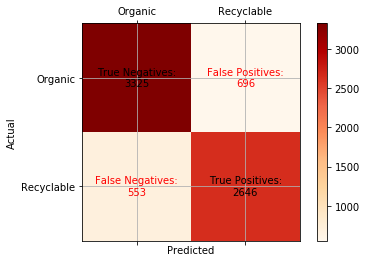

In [19]:
threshold = 0.39

y_true = np.array([0] * num_organic + [1] * num_recyclable)
y_pred = np.hstack(probabilities > threshold)

confusion_matrix_baseline = confusion_matrix(y_true, y_pred)

print('**Results:** \n')
print('Accuracy Score: {}'.format(round(accuracy_score(y_true, y_pred), 2)))
print('Recall Score: {}'.format(round(recall_score(y_true, y_pred), 2)))
print('Specificity Score: {}'.format(round(confusion_matrix_baseline[0][0] / sum(confusion_matrix_baseline[0]), 2)))
plot_confusion_matrix(y_true, y_pred, 'Recyclable', 'Organic')

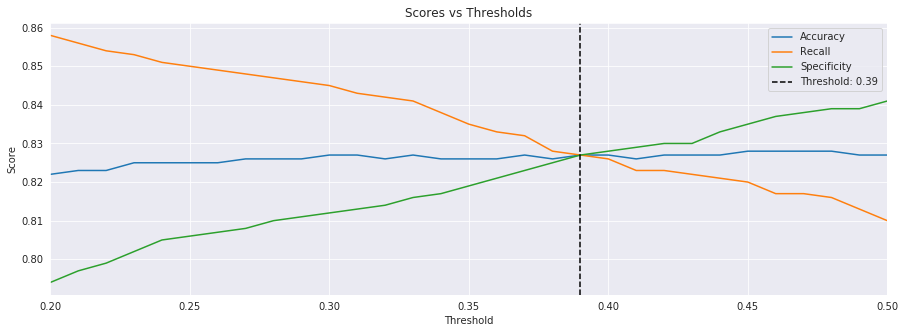

In [39]:
sns.set_style('darkgrid')

threshold_results.plot(x = 'Threshold', y = ['Accuracy', 'Recall', 'Specificity'], figsize = (15,5))
plt.title('Scores vs Thresholds')
plt.ylabel('Score')
plt.axvline(x = 0.39, color = 'black', linestyle = '--', label = 'Threshold: 0.39')
plt.legend(loc = 'upper right')
plt.show()

In [42]:
errors = pd.read_csv('TRAINING_LOGS/baseline_original_results.csv')

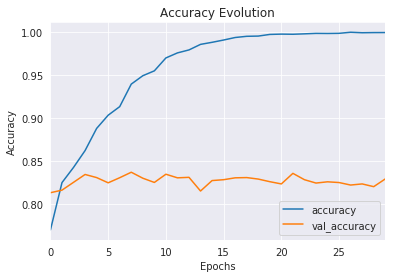

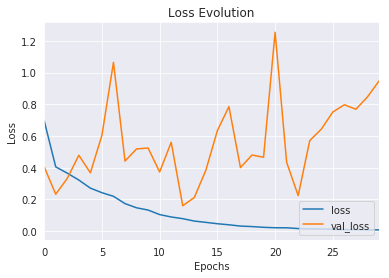

In [59]:
errors.reset_index().plot(x = 'index', y = ['accuracy', 'val_accuracy'])
plt.title('Accuracy Evolution')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc = 'lower right')
plt.show()

errors.reset_index().plot(x = 'index', y = ['loss', 'val_loss'])
plt.title('Loss Evolution')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc = 'lower right')
plt.show()